<span style="font-size:5em;"><strong>EDA Notebook: Spoty Songs Dataset</strong></span>

see https://www.kaggle.com/c/bfh-spotify-challenge/data?select=test.csv

# Technical setting

In [ ]:
!pip install pd-explain

In [1]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
notebook_dir = os.path.dirname(os.path.abspath('spotify.ipynb'))

project_root = os.path.abspath(os.path.join(notebook_dir, os.pardir, os.pardir))


src_dir = os.path.join(project_root, 'src')
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

# <span style="font-size:1.5em;"><strong>Query Result & Outlier Explanation</strong></span>



<span style="font-size:1em;"><strong>We explore the Spotify dataset in order to find what characterizes popular songs.
First, we load the dataset into a dataframe.</strong></span>



In [2]:
import pandas as pd
import pd_explain

songs_df = (pd.read_csv(r"..\Datasets\spotify_all.csv"))
songs_df

usetex-False


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,decade,popularity_score,main_artist,duration_minutes
0,0.991000,['Mamie Smith'],0.598,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,...,Keep A Song In Your Soul,12,0.0936,149.976,0.6340,1920,1920,10,Mamie Smith,2.805550
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,...,I Put A Spell On You,7,0.0534,86.889,0.9500,1920,1920,0,Screamin' Jay Hawkins,2.503333
2,0.993000,['Mamie Smith'],0.647,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,...,Golfing Papa,4,0.1740,97.600,0.6890,1920,1920,0,Mamie Smith,2.730450
3,0.000173,['Oscar Velazquez'],0.730,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,...,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920,1920,10,Oscar Velazquez,7.034783
4,0.295000,['Mixe'],0.704,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,...,Xuniverxe,2,0.0768,122.076,0.2990,1920,1920,0,Mixe,2.753733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,...,The One,0,0.0356,125.972,0.1860,2020,2020,0,DJ Combo,2.460250
174385,0.795000,['Alessia Cara'],0.429,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,...,A Little More,0,0.0360,94.710,0.2280,2021,2020,0,Alessia Cara,2.412000
174386,0.806000,['Roger Fly'],0.671,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,...,Together,0,0.0282,108.058,0.7140,2020,2020,0,Roger Fly,3.635783
174387,0.920000,['Taylor Swift'],0.462,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,...,champagne problems,69,0.0377,171.319,0.3200,2021,2020,60,Taylor Swift,4.066667


<span style="font-size:1.5em;"><strong>Then, we filter by popularity, to select popular(greater than 65) songs.</strong></span>




In [3]:
popular_songs_df = songs_df[songs_df['popularity'] > 65]
popular_songs_df

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,decade,popularity_score,main_artist,duration_minutes
4262,0.67300,"['Bing Crosby', 'Ken Darby Singers', 'John Sco...",0.317,0.1580,0,4so0Wek9Ig1p6CRCHuINwW,0.353000,9,0.3380,-16.485,...,White Christmas,80,0.0381,130.503,0.247,1942,1940,80,Bing Crosby,2.958000
4662,0.97000,['Judy Garland'],0.156,0.1840,0,030mot3ZKR3oskfMsqDB2R,0.004580,6,0.2600,-14.820,...,Have Yourself A Merry Little Christmas,74,0.0393,180.887,0.107,1944,1940,70,Judy Garland,2.705550
5262,0.79900,['Gene Autry'],0.834,0.3710,0,25leEEaz1gIpp7o21Fqyjo,0.000000,1,0.2750,-11.990,...,Here Comes Santa Claus (Right Down Santa Claus...,73,0.0358,96.628,0.976,1947,1940,70,Gene Autry,2.504450
5662,0.92600,"['Bing Crosby', 'The Andrews Sisters']",0.641,0.4130,0,0cAhE2iDJApegDnVRx6fCK,0.000000,3,0.1910,-5.624,...,Twelve Days Of Christmas,68,0.0435,143.522,0.834,1949,1940,60,Bing Crosby,3.395767
5663,0.99400,"['Erik Satie', 'Philippe Entremont']",0.469,0.0128,0,5NGtFXVpXSvwunEIGeviY3,0.937000,7,0.0941,-36.856,...,Gymnopédie No. 1,68,0.1190,72.765,0.354,1949,1940,60,Erik Satie,3.431117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174183,0.02050,"['RAYE', 'Rudimental']",0.749,0.8200,0,3DTqHfTGj1c6y2gDXsTez4,0.000685,7,0.0775,-6.114,...,Regardless,76,0.0478,120.066,0.534,2020,2020,70,RAYE,3.292883
174185,0.26300,['Jasiah'],0.760,0.7940,1,0IGxkEgMeF1dwOSIj2IUrT,0.003240,10,0.0996,-4.311,...,Crisis,68,0.3440,165.990,0.583,2020,2020,60,Jasiah,1.826583
174187,0.01360,['Playboi Carti'],0.876,0.4920,1,5UusfWUMMLEXLMc1ViNZoe,0.000283,11,0.0678,-8.110,...,@ MEH,70,0.1530,151.044,0.400,2020,2020,70,Playboi Carti,2.779983
174351,0.00984,['Foo Fighters'],0.530,0.7590,0,3NUmUIyzNLBp8bCFMH8Mif,0.000000,7,0.3190,-7.067,...,Waiting On A War,69,0.0351,131.999,0.502,2021,2020,60,Foo Fighters,4.230667


<span style="font-size:1.5em;"><strong>To interpret the result, we call explain():</strong></span>




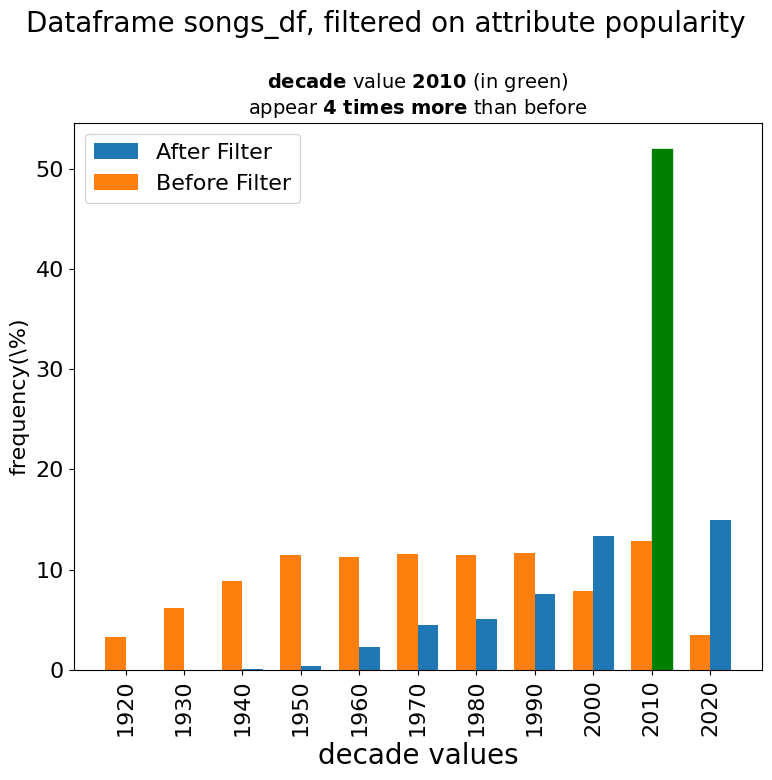

In [4]:
popular_songs_df.explain()

<span style="font-size:1.5em;"><strong>We conclude that popular songs are often newer. Lets consider the newer songs and assess our conclusion. </strong></span>



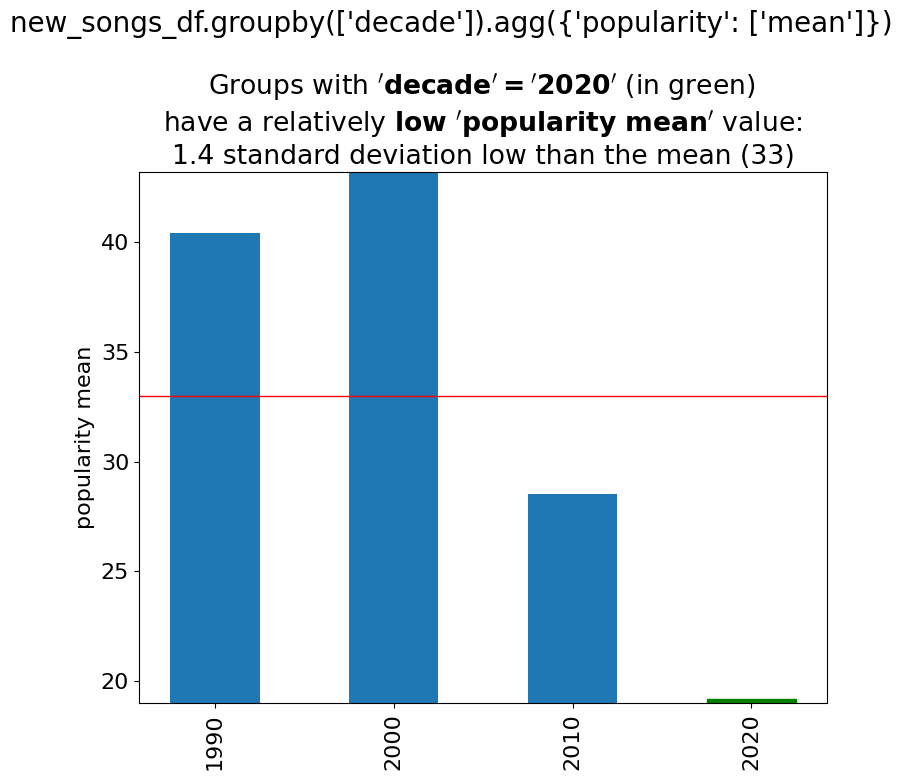

In [13]:
new_songs_df = songs_df[songs_df['year'] >= 1990]
gb_decade = new_songs_df.groupby(['decade']).popularity.mean()
gb_decade.explain()#diversity

<span style="font-size:1.5em;"><strong>After grouping by decade, we see that our conclusion wasn't accurate- the mean popularity is much lower than expected in the 2020s.
We further investigate this occurance as an outlier:</strong></span>





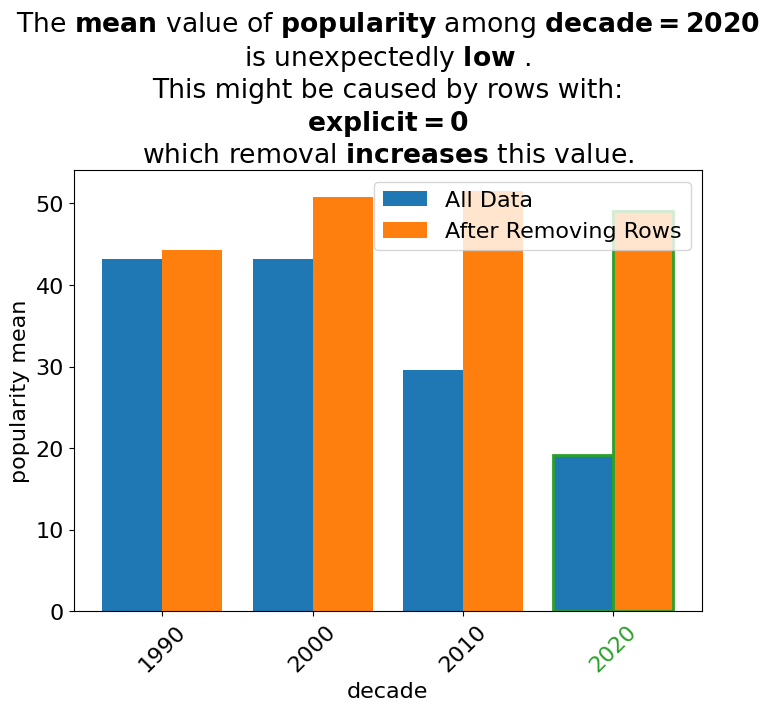

In [14]:
gb_decade.explain(explainer='outlier', target=2020, dir='low')

<span style="font-size:1.5em;"><strong>And we found that the outlier was caused by non-explicit songs, which were less popular in recent years thus decreasing the popularity mean. </strong></span>






# <span style="font-size:1.5em;"><strong>Boolean Join</strong></span>






<span style="font-size:1.5em;"><strong>We are asked weather or not there are any highly acoustic ('acousticness' attribute above .95) songs that are performed by a popular artist.</strong></span>

<span style="font-size:1.5em;"><strong>If so, what popular artist is the most impactful, i.e. contributes the most to the existance of acoustic songs by popular artists?</strong></span>

<span style="font-size:1.5em;"><strong>Popular artist is an artist that:</strong></span>

<span style="font-size:1.5em;"><strong>    1. Has at least 100 songs:</strong></span>







In [3]:
count_artist = songs_df.groupby('main_artist')['main_artist'].count()
count_artist = count_artist[count_artist.values > 100]
frequent_df = songs_df[songs_df['main_artist'].isin(count_artist.index)]
frequent_df

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,decade,popularity_score,main_artist,duration_minutes
8,0.9960,['Francisco Canaro'],0.469,0.238,0,02i59gYdjlhBmbbWhf8YuK,0.960000,8,0.1490,-18.717,...,La Chacarera - Remasterizado,0,0.0741,130.060,0.621,1920,1920,0,Francisco Canaro,2.447333
11,0.9960,['Francisco Canaro'],0.579,0.356,0,0ANuF7SvPeIHanGcCpy9jR,0.948000,10,0.1740,-14.574,...,Desengaño - Remasterizado,0,0.0394,131.494,0.703,1920,1920,0,Francisco Canaro,2.786883
17,0.9960,['Francisco Canaro'],0.468,0.533,0,0KGiP9EW1xtojDHsTGARL5,0.870000,1,0.1790,-11.002,...,El Africano - Remasterizado,0,0.0452,136.573,0.728,1920,1920,0,Francisco Canaro,2.957117
63,0.9960,['Francisco Canaro'],0.369,0.285,0,1QI5WTvnpNV5vJJQU4DPX1,0.938000,7,0.1930,-16.523,...,El Baccarat - Remasterizado,0,0.0528,129.558,0.635,1920,1920,0,Francisco Canaro,2.804883
93,0.9960,['Francisco Canaro'],0.433,0.322,0,2ijTs6mInatQG5cbElWaP3,0.983000,9,0.2160,-16.077,...,Tierrita - Remasterizado,0,0.0414,133.515,0.763,1920,1920,0,Francisco Canaro,2.478667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174303,0.0216,['Don Omar'],0.800,0.849,0,7fj7ih6z6ruk1M1RLc2NqK,0.000068,1,0.1870,-3.245,...,Ojitos Chiquitos,0,0.2410,170.211,0.804,2021,2020,0,Don Omar,3.851333
174305,0.2170,['Don Omar'],0.741,0.787,0,7jkC3fhNUJZDIjpusnnN10,0.017900,5,0.0835,-6.228,...,Pobre Diabla,0,0.0525,91.993,0.771,2021,2020,0,Don Omar,4.261333
174307,0.1070,['Don Omar'],0.886,0.708,0,7u6U4fGBmcDSYpFPMW5YlQ,0.011400,4,0.0440,-5.915,...,Salió El Sol,0,0.0911,109.976,0.965,2021,2020,0,Don Omar,5.288000
174309,0.2170,['Don Omar'],0.741,0.787,0,7wPssXinLiw4KoSpdQVpyn,0.017900,5,0.0835,-6.228,...,Pobre Diabla,0,0.0525,91.993,0.771,2021,2020,0,Don Omar,4.261333


<span style="font-size:1.5em;"><strong>2. Whose songs' popularity mean is higher than 60:</strong></span>



In [4]:
gb_artist_popularity = frequent_df.groupby('main_artist')['popularity'].mean()
gb_artist_popularity = gb_artist_popularity[gb_artist_popularity.values > 60] 
gb_artist_popularity

main_artist
Drake           62.026144
Kanye West      61.550847
Taylor Swift    61.168889
Name: popularity_mean, dtype: float64

<span style="font-size:1.5em;"><strong>Now we create a dataframe of the acoustic songs:</strong></span>




In [7]:
acoustic_df = frequent_df[frequent_df['acousticness'] > 0.95]
acoustic_df

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,decade,popularity_score,main_artist,duration_minutes
8,0.996,['Francisco Canaro'],0.469,0.2380,0,02i59gYdjlhBmbbWhf8YuK,0.9600,8,0.149,-18.717,...,La Chacarera - Remasterizado,0,0.0741,130.060,0.6210,1920,1920,0,Francisco Canaro,2.447333
11,0.996,['Francisco Canaro'],0.579,0.3560,0,0ANuF7SvPeIHanGcCpy9jR,0.9480,10,0.174,-14.574,...,Desengaño - Remasterizado,0,0.0394,131.494,0.7030,1920,1920,0,Francisco Canaro,2.786883
17,0.996,['Francisco Canaro'],0.468,0.5330,0,0KGiP9EW1xtojDHsTGARL5,0.8700,1,0.179,-11.002,...,El Africano - Remasterizado,0,0.0452,136.573,0.7280,1920,1920,0,Francisco Canaro,2.957117
63,0.996,['Francisco Canaro'],0.369,0.2850,0,1QI5WTvnpNV5vJJQU4DPX1,0.9380,7,0.193,-16.523,...,El Baccarat - Remasterizado,0,0.0528,129.558,0.6350,1920,1920,0,Francisco Canaro,2.804883
93,0.996,['Francisco Canaro'],0.433,0.3220,0,2ijTs6mInatQG5cbElWaP3,0.9830,9,0.216,-16.077,...,Tierrita - Remasterizado,0,0.0414,133.515,0.7630,1920,1920,0,Francisco Canaro,2.478667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172091,0.988,"['Wolfgang Amadeus Mozart', 'Mitsuko Uchida', ...",0.209,0.0314,0,5iNbFdlGQ7d1y2HfIfvdNP,0.8400,10,0.102,-26.249,...,"Piano Concerto No.20 in D minor, K.466: 2. Rom...",55,0.0343,81.629,0.0983,2010,2010,50,Wolfgang Amadeus Mozart,9.596000
172442,0.951,"['Johann Strauss II', 'Mariss Jansons', 'Wiene...",0.309,0.1290,0,0Lsb6TDMMmYvxiRrXwbMLd,0.9140,10,0.705,-18.453,...,"Freuet euch des Lebens, Walzer, Op. 340",16,0.0375,91.365,0.2080,2012,2010,10,Johann Strauss II,8.716667
172523,0.983,"['Camille Saint-Saëns', 'Stéphane Tétreault', ...",0.116,0.0590,0,59eTbibtvvBIGj27eN3zqq,0.9130,7,0.152,-26.632,...,Le Cygne,57,0.0446,94.137,0.0393,2012,2010,50,Camille Saint-Saëns,3.583117
173132,0.959,"['TandMProductionCo', 'TandMMusic', 'TandMTV']",0.581,0.2200,0,4vCC7lySdAmQoPwkp0SH2O,0.0189,10,0.103,-14.113,...,"Frederick's Bass Tester, Year 5, Track #93",0,0.0681,130.093,0.0723,2014,2010,0,TandMProductionCo,2.189067


<span style="font-size:1.5em;"><strong>And finally, apply a binary JOIN(True/False If the result is not-empty/empty).
</strong></span>



In [8]:
acoustic_df.b_join(gb_artist_popularity, on='main_artist')

True

<span style="font-size:1.5em;"><strong>Hence, there ARE in fact acoustic songs by popular artists.</strong></span>


<span style="font-size:1.5em;"><strong>We can also set explain=True to get an explanation that finds the most impactful artist.
Consider='right', to consider facts from the artists dataframe and not the songs.
</strong></span>




True

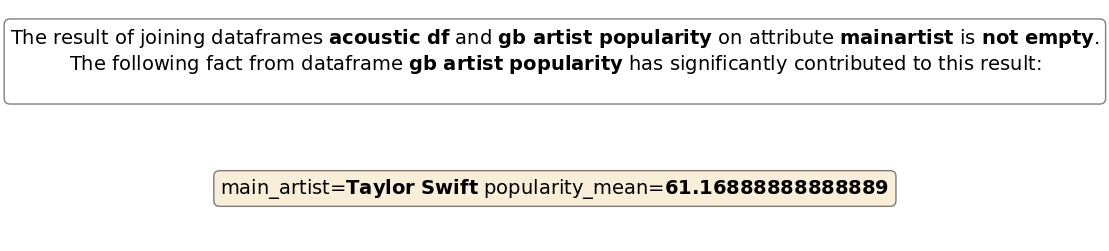

In [15]:
acoustic_df.b_join(gb_artist_popularity, on='main_artist', explain=True, consider='right')